BIDV

In [1]:
#import thư viện cần thiết
import numpy as np
import pandas as pd
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, GRU
from keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [2]:
# Đọc file và tiền xử lí dữ liệu
df = pd.read_csv('../data/BIDV.csv')
# Tiền xử lí dữ liệu
# Hàm chuyển đổi "Vol." từ chuỗi sang số
def convert_volume_to_number(volume_str):
    if volume_str[-1] == 'K':
        return int(float(volume_str[:-1]) * 1000)
    elif volume_str[-1] == 'M':
        return int(float(volume_str[:-1]) * 1000000)
    elif volume_str[-1] == 'B':
        return int(float(volume_str[:-1]) * 1000000000)
    else:
        return int(volume_str)
    
# Áp dụng hàm chuyển đổi cho cột "Vol."
df["Vol."] = df["Vol."].apply(convert_volume_to_number)

# Hàm chuyển đổi "Change %" từ chuỗi sang số
def convert_change_to_number(change_str):
    new_change = float(change_str.strip('%')) / 100
    return new_change

# Áp dụng hàm chuyển đổi cho cột "Change %"
df["Change %"] = df["Change %"].apply(convert_change_to_number)

# Hàm chuyển giá từ chuỗi sang số
def convert_str_to_number(str):
    return float(str.replace(',', ''))

# Áp dụng hàm chuyển đổi cho các cột giá trị
df['Price'] = df['Price'].apply(convert_str_to_number)
df['Open'] = df['Open'].apply(convert_str_to_number)
df['High'] = df['High'].apply(convert_str_to_number)
df['Low'] = df['Low'].apply(convert_str_to_number)

In [3]:
df1=df.reset_index()['Price']

In [4]:
#. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [5]:
#. Chia train test
train_size = int(0.6 * len(df1))
test_size = int(0.4 * len(df1))

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]

In [6]:
#. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [7]:
# Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [8]:
#  Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [9]:
# Define LSTM Model

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

c:\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
# . Fit mô hình với dữ liệu train
model.fit(X_train,y_train,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 6s 96ms/step - loss: 0.0802
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - loss: 0.0138
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - loss: 0.0092
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - loss: 0.0071
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - loss: 0.0064
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - loss: 0.0050
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - loss: 0.0046
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - loss: 0.0051
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - loss: 0.0053
Epoch 10/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - loss: 0.0042
Epoch 11/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - loss: 0.0038
Epoch 12/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - loss: 0.0033
Epoch 13/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - loss: 0.0033
Epoch 14/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - loss: 0.0031
Epoch 15/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - lo

In [11]:
# Dự báo dữ liệu test, val
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [12]:
# Chuẩn hóa dữ liệu y_pred,ytest
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)
ytest = scaler.inverse_transform(ytest.reshape(-1, 1))

In [13]:
# Tính RMSE
test_rmse = np.sqrt(metrics.mean_squared_error(ytest, y_pred))
print('Testing RMSE:', test_rmse)

# Tính MAPE (Mean Absolute Percentage Error)
test_mape = np.mean(np.abs((ytest - y_pred) / ytest)) * 100
print('Testing MAPE:', test_mape)

#Tinh Mae
mae = np.mean(np.abs(np.array(y_pred) - np.array(ytest)))
print('Testing Mae:', mae)

Testing RMSE: 994.4944842235514
Testing MAPE: 2.544865610331172
Testing Mae: 749.4589040961778


In [14]:
# Dự báo 30 ngày tiếp theo
x_input=test_data[-100:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

[0.11593183]
101
1 day input [0.09667164 0.11675661 0.12931218 0.10797067 0.10294779 0.09918144
 0.09918144 0.06779416 0.07030725 0.07156051 0.04519611 0.05021899
 0.04896245 0.05524188 0.05524188 0.03766342 0.03641016 0.04394285
 0.02762094 0.03515362 0.04770919 0.03766342 0.05021899 0.04770919
 0.05147553 0.03515362 0.03515362 0.03766342 0.03891997 0.02259805
 0.02259805 0.03264054 0.02762094 0.02762094 0.01757517 0.02008825
 0.03515362 0.         0.02259805 0.03013074 0.03515362 0.04268631
 0.05021899 0.04770919 0.07030725 0.06528436 0.06151802 0.05272879
 0.03891997 0.05021899 0.05775168 0.04519611 0.05272879 0.03515362
 0.01255557 0.04394285 0.06277456 0.06277456 0.09039222 0.0979249
 0.10545759 0.0979249  0.10043798 0.09039222 0.09039222 0.10671413
 0.10545759 0.10545759 0.12303604 0.10420433 0.11424681 0.11550335
 0.12931218 0.12303604 0.11173701 0.11801316 0.12805892 0.10545759
 0.12303604 0.13056872 0.12554584 0.10797067 0.0929053  0.0979249
 0.11299027 0.10545759 0.13810141 0

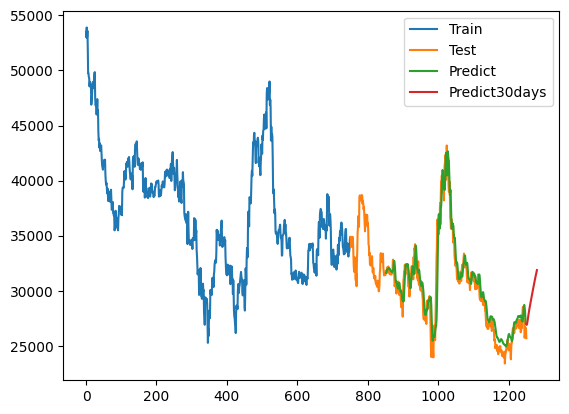

In [15]:
# Vẽ hình du doan 30 ngay

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))

plt.legend(['Train','Test','Predict','Predict30days'])
plt.show()

In [16]:
# Dự báo 60 ngày tiếp theo
x_input=test_data[-100:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output_60=[]
n_steps=100
i=0
while(i<60):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output_60.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output_60.extend(yhat.tolist())
        i=i+1

[0.11593183]
101
1 day input [0.09667164 0.11675661 0.12931218 0.10797067 0.10294779 0.09918144
 0.09918144 0.06779416 0.07030725 0.07156051 0.04519611 0.05021899
 0.04896245 0.05524188 0.05524188 0.03766342 0.03641016 0.04394285
 0.02762094 0.03515362 0.04770919 0.03766342 0.05021899 0.04770919
 0.05147553 0.03515362 0.03515362 0.03766342 0.03891997 0.02259805
 0.02259805 0.03264054 0.02762094 0.02762094 0.01757517 0.02008825
 0.03515362 0.         0.02259805 0.03013074 0.03515362 0.04268631
 0.05021899 0.04770919 0.07030725 0.06528436 0.06151802 0.05272879
 0.03891997 0.05021899 0.05775168 0.04519611 0.05272879 0.03515362
 0.01255557 0.04394285 0.06277456 0.06277456 0.09039222 0.0979249
 0.10545759 0.0979249  0.10043798 0.09039222 0.09039222 0.10671413
 0.10545759 0.10545759 0.12303604 0.10420433 0.11424681 0.11550335
 0.12931218 0.12303604 0.11173701 0.11801316 0.12805892 0.10545759
 0.12303604 0.13056872 0.12554584 0.10797067 0.0929053  0.0979249
 0.11299027 0.10545759 0.13810141 0

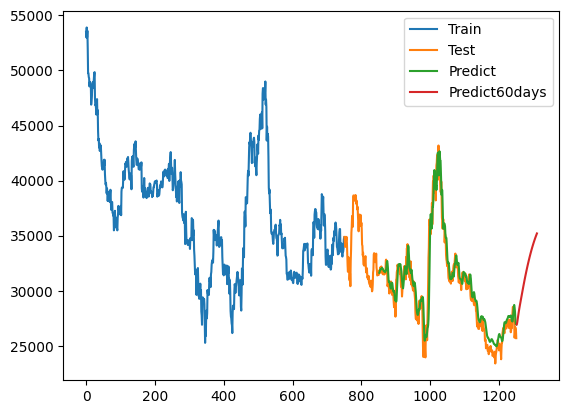

In [17]:
#Vẽ hình du doan 60 ngay

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
prediect_data_index_60 = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+59, step=1)
plt.plot(prediect_data_index_60,scaler.inverse_transform(lst_output_60))

plt.legend(['Train','Test','Predict','Predict60days'])
plt.show()

In [18]:
#Dự báo 90 ngày tiếp theo
x_input=test_data[-100:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output_90=[]
n_steps=100
i=0
while(i<90):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output_90.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output_90.extend(yhat.tolist())
        i=i+1

[0.11593183]
101
1 day input [0.09667164 0.11675661 0.12931218 0.10797067 0.10294779 0.09918144
 0.09918144 0.06779416 0.07030725 0.07156051 0.04519611 0.05021899
 0.04896245 0.05524188 0.05524188 0.03766342 0.03641016 0.04394285
 0.02762094 0.03515362 0.04770919 0.03766342 0.05021899 0.04770919
 0.05147553 0.03515362 0.03515362 0.03766342 0.03891997 0.02259805
 0.02259805 0.03264054 0.02762094 0.02762094 0.01757517 0.02008825
 0.03515362 0.         0.02259805 0.03013074 0.03515362 0.04268631
 0.05021899 0.04770919 0.07030725 0.06528436 0.06151802 0.05272879
 0.03891997 0.05021899 0.05775168 0.04519611 0.05272879 0.03515362
 0.01255557 0.04394285 0.06277456 0.06277456 0.09039222 0.0979249
 0.10545759 0.0979249  0.10043798 0.09039222 0.09039222 0.10671413
 0.10545759 0.10545759 0.12303604 0.10420433 0.11424681 0.11550335
 0.12931218 0.12303604 0.11173701 0.11801316 0.12805892 0.10545759
 0.12303604 0.13056872 0.12554584 0.10797067 0.0929053  0.0979249
 0.11299027 0.10545759 0.13810141 0

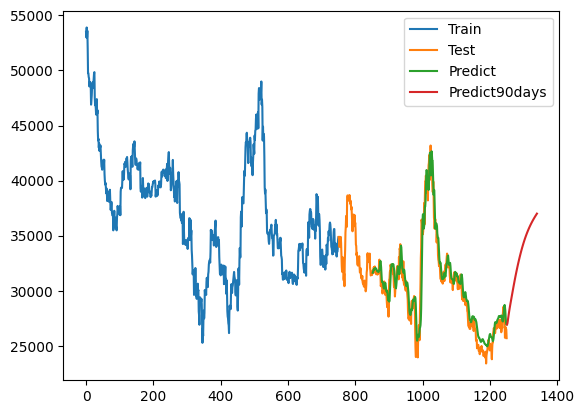

In [19]:
#.Vẽ hình 90 ngay 

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
prediect_data_index_90 = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+89, step=1)
plt.plot(prediect_data_index_90,scaler.inverse_transform(lst_output_90))
plt.legend(['Train','Test','Predict','Predict90days'])
plt.show()

VIB

In [20]:
# Đọc file và tiền xử lí dữ liệu
df = pd.read_csv('../data/VIB.csv')
# Tiền xử lí dữ liệu
# Hàm chuyển đổi "Vol." từ chuỗi sang số
def convert_volume_to_number(volume_str):
    if volume_str[-1] == 'K':
        return int(float(volume_str[:-1]) * 1000)
    elif volume_str[-1] == 'M':
        return int(float(volume_str[:-1]) * 1000000)
    elif volume_str[-1] == 'B':
        return int(float(volume_str[:-1]) * 1000000000)
    else:
        return int(volume_str)
    
# Áp dụng hàm chuyển đổi cho cột "Vol."
df["Vol."] = df["Vol."].apply(convert_volume_to_number)

# Hàm chuyển đổi "Change %" từ chuỗi sang số
def convert_change_to_number(change_str):
    new_change = float(change_str.strip('%')) / 100
    return new_change

# Áp dụng hàm chuyển đổi cho cột "Change %"
df["Change %"] = df["Change %"].apply(convert_change_to_number)

# Hàm chuyển giá từ chuỗi sang số
def convert_str_to_number(str):
    return float(str.replace(',', ''))

# Áp dụng hàm chuyển đổi cho các cột giá trị
df['Price'] = df['Price'].apply(convert_str_to_number)
df['Open'] = df['Open'].apply(convert_str_to_number)
df['High'] = df['High'].apply(convert_str_to_number)
df['Low'] = df['Low'].apply(convert_str_to_number)

In [21]:
df1=df.reset_index()['Price']

In [22]:
#. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [23]:
#. Chia train test
train_size = int(0.6 * len(df1))
test_size = int(0.4 * len(df1))

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]

In [24]:
#. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [25]:
# Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [26]:
#Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [27]:
# Define LSTM Model

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

c:\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [28]:
# . Fit mô hình với dữ liệu train
model.fit(X_train,y_train,epochs=100,batch_size=64,verbose=1)

Epoch 1/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 85ms/step - loss: 0.2023
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - loss: 0.0194
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - loss: 0.0096
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - loss: 0.0074
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 0.0051
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - loss: 0.0042
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - loss: 0.0048
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 0.0042
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 0.0034
Epoch 10/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - loss: 0.0032
Epoch 11/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - loss: 0.0032
Epoch 12/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - loss: 0.0030
Epoch 13/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 0.0038
Epoch 14/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 0.0036
Epoch 15/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - l

In [29]:
#. Dự báo dữ liệu test, val
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [30]:
# Chuẩn hóa dữ liệu y_pred,ytest
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)
ytest = scaler.inverse_transform(ytest.reshape(-1, 1))

In [31]:
# Tính RMSE
test_rmse = np.sqrt(metrics.mean_squared_error(ytest, y_pred))
print('Testing RMSE:', test_rmse)

# Tính MAPE (Mean Absolute Percentage Error)
test_mape = np.mean(np.abs((ytest - y_pred) / ytest)) * 100
print('Testing MAPE:', test_mape)

#Tinh Mae
mae = np.mean(np.abs(np.array(y_pred) - np.array(ytest)))
print('Testing Mae:', mae)

Testing RMSE: 1048.552672788198
Testing MAPE: 10.506797480809833
Testing Mae: 933.3273772040302


In [32]:
# Dự báo 30 ngày tiếp theo
x_input=test_data[-100:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

[0.20488681]
101
1 day input [0.09370148 0.09370148 0.09677616 0.09677616 0.08907425 0.09214892
 0.08907425 0.07988067 0.06913452 0.06758197 0.06758197 0.07065664
 0.07065664 0.06554233 0.06106731 0.05363938 0.05363938 0.05214771
 0.05065603 0.05363938 0.05363938 0.05513105 0.05659229 0.05659229
 0.05363938 0.05363938 0.05659229 0.05659229 0.05214771 0.05214771
 0.05513105 0.05808396 0.06255898 0.06106731 0.067034   0.06602941
 0.06602941 0.0674602  0.0674602  0.0674602  0.06892143 0.07035222
 0.07178301 0.07324424 0.07467503 0.07467503 0.07324424 0.07610582
 0.07610582 0.07610582 0.07467503 0.17930531 0.17729611 0.17324728
 0.17525648 0.17930531 0.17930531 0.1813145  0.18536333 0.19139091
 0.19139091 0.18938172 0.18737252 0.19139091 0.19139091 0.19139091
 0.19543974 0.19543974 0.19543974 0.19744893 0.19744893 0.19948857
 0.20149776 0.19948857 0.19948857 0.19543974 0.19543974 0.19543974
 0.19139091 0.19139091 0.18536333 0.1813145  0.18332369 0.19543974
 0.18938172 0.19744893 0.20149776

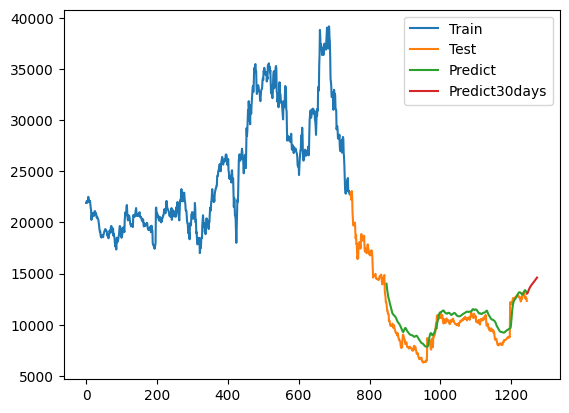

In [33]:
# Vẽ hình du doan 30 ngay

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))

plt.legend(['Train','Test','Predict','Predict30days'])
plt.show()

In [34]:
# Dự báo 60 ngày tiếp theo
x_input=test_data[-100:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output_60=[]
n_steps=100
i=0
while(i<60):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output_60.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output_60.extend(yhat.tolist())
        i=i+1

[0.20488681]
101
1 day input [0.09370148 0.09370148 0.09677616 0.09677616 0.08907425 0.09214892
 0.08907425 0.07988067 0.06913452 0.06758197 0.06758197 0.07065664
 0.07065664 0.06554233 0.06106731 0.05363938 0.05363938 0.05214771
 0.05065603 0.05363938 0.05363938 0.05513105 0.05659229 0.05659229
 0.05363938 0.05363938 0.05659229 0.05659229 0.05214771 0.05214771
 0.05513105 0.05808396 0.06255898 0.06106731 0.067034   0.06602941
 0.06602941 0.0674602  0.0674602  0.0674602  0.06892143 0.07035222
 0.07178301 0.07324424 0.07467503 0.07467503 0.07324424 0.07610582
 0.07610582 0.07610582 0.07467503 0.17930531 0.17729611 0.17324728
 0.17525648 0.17930531 0.17930531 0.1813145  0.18536333 0.19139091
 0.19139091 0.18938172 0.18737252 0.19139091 0.19139091 0.19139091
 0.19543974 0.19543974 0.19543974 0.19744893 0.19744893 0.19948857
 0.20149776 0.19948857 0.19948857 0.19543974 0.19543974 0.19543974
 0.19139091 0.19139091 0.18536333 0.1813145  0.18332369 0.19543974
 0.18938172 0.19744893 0.20149776

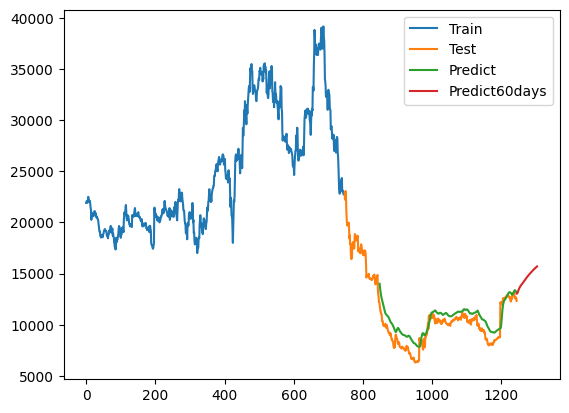

In [35]:
#Vẽ hình du doan 60 ngay

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
prediect_data_index_60 = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+59, step=1)
plt.plot(prediect_data_index_60,scaler.inverse_transform(lst_output_60))

plt.legend(['Train','Test','Predict','Predict60days'])
plt.show()

In [36]:
#Dự báo 90 ngày tiếp theo
x_input=test_data[-100:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output_90=[]
n_steps=100
i=0
while(i<90):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output_90.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output_90.extend(yhat.tolist())
        i=i+1

[0.20488681]
101
1 day input [0.09370148 0.09370148 0.09677616 0.09677616 0.08907425 0.09214892
 0.08907425 0.07988067 0.06913452 0.06758197 0.06758197 0.07065664
 0.07065664 0.06554233 0.06106731 0.05363938 0.05363938 0.05214771
 0.05065603 0.05363938 0.05363938 0.05513105 0.05659229 0.05659229
 0.05363938 0.05363938 0.05659229 0.05659229 0.05214771 0.05214771
 0.05513105 0.05808396 0.06255898 0.06106731 0.067034   0.06602941
 0.06602941 0.0674602  0.0674602  0.0674602  0.06892143 0.07035222
 0.07178301 0.07324424 0.07467503 0.07467503 0.07324424 0.07610582
 0.07610582 0.07610582 0.07467503 0.17930531 0.17729611 0.17324728
 0.17525648 0.17930531 0.17930531 0.1813145  0.18536333 0.19139091
 0.19139091 0.18938172 0.18737252 0.19139091 0.19139091 0.19139091
 0.19543974 0.19543974 0.19543974 0.19744893 0.19744893 0.19948857
 0.20149776 0.19948857 0.19948857 0.19543974 0.19543974 0.19543974
 0.19139091 0.19139091 0.18536333 0.1813145  0.18332369 0.19543974
 0.18938172 0.19744893 0.20149776

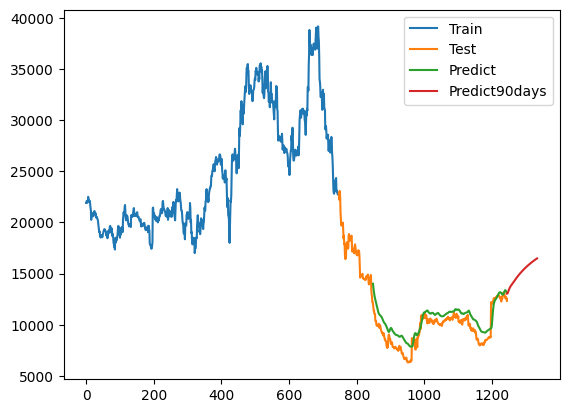

In [37]:
#.Vẽ hình 90 ngay 

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
prediect_data_index_90 = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+89, step=1)
plt.plot(prediect_data_index_90,scaler.inverse_transform(lst_output_90))
plt.legend(['Train','Test','Predict','Predict90days'])
plt.show()

STB

In [38]:
# Đọc file và tiền xử lí dữ liệu
df = pd.read_csv('../data/STB.csv')
# Tiền xử lí dữ liệu
# Hàm chuyển đổi "Vol." từ chuỗi sang số
def convert_volume_to_number(volume_str):
    if volume_str[-1] == 'K':
        return int(float(volume_str[:-1]) * 1000)
    elif volume_str[-1] == 'M':
        return int(float(volume_str[:-1]) * 1000000)
    elif volume_str[-1] == 'B':
        return int(float(volume_str[:-1]) * 1000000000)
    else:
        return int(volume_str)
    
# Áp dụng hàm chuyển đổi cho cột "Vol."
df["Vol."] = df["Vol."].apply(convert_volume_to_number)

# Hàm chuyển đổi "Change %" từ chuỗi sang số
def convert_change_to_number(change_str):
    new_change = float(change_str.strip('%')) / 100
    return new_change

# Áp dụng hàm chuyển đổi cho cột "Change %"
df["Change %"] = df["Change %"].apply(convert_change_to_number)

# Hàm chuyển giá từ chuỗi sang số
def convert_str_to_number(str):
    return float(str.replace(',', ''))

# Áp dụng hàm chuyển đổi cho các cột giá trị
df['Price'] = df['Price'].apply(convert_str_to_number)
df['Open'] = df['Open'].apply(convert_str_to_number)
df['High'] = df['High'].apply(convert_str_to_number)
df['Low'] = df['Low'].apply(convert_str_to_number)

In [39]:
df1=df.reset_index()['Price']

In [40]:
#. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [41]:
#. Chia train test
train_size = int(0.6 * len(df1))
test_size = int(0.4 * len(df1))

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]

In [42]:
#. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [43]:
# Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [44]:
#Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [45]:
# Define LSTM Model

model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

c:\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [46]:
# . Fit mô hình với dữ liệu train
model.fit(X_train,y_train,epochs=100,batch_size=64,verbose=1)

Epoch 1/100


11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 0.1818
Epoch 2/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.0216
Epoch 3/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0126
Epoch 4/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0095
Epoch 5/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - loss: 0.0070
Epoch 6/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0062
Epoch 7/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0053
Epoch 8/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - loss: 0.0048
Epoch 9/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 0.0040
Epoch 10/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - loss: 0.0037
Epoch 11/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - loss: 0.0039
Epoch 12/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0036
Epoch 13/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 0.0032
Epoch 14/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0034
Epoch 15/100
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0034
E

In [47]:
#. Dự báo dữ liệu test, val
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [48]:
# Chuẩn hóa dữ liệu y_pred,ytest
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)
ytest = scaler.inverse_transform(ytest.reshape(-1, 1))

In [49]:
# Tính RMSE
test_rmse = np.sqrt(metrics.mean_squared_error(ytest, y_pred))
print('Testing RMSE:', test_rmse)

# Tính MAPE (Mean Absolute Percentage Error)
test_mape = np.mean(np.abs((ytest - y_pred) / ytest)) * 100
print('Testing MAPE:', test_mape)

#Tinh Mae
mae = np.mean(np.abs(np.array(y_pred) - np.array(ytest)))
print('Testing Mae:', mae)

Testing RMSE: 1502.8702874714415
Testing MAPE: 13.556885438079302
Testing Mae: 1449.3088801104323


In [50]:
# Dự báo 30 ngày tiếp theo
x_input=test_data[-100:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

[0.23186044]
101
1 day input [0.14185639 0.14711033 0.14711033 0.15411559 0.14886165 0.14886165
 0.14360771 0.14185639 0.14360771 0.14711033 0.14535902 0.14185639
 0.14360771 0.14360771 0.14535902 0.14185639 0.14535902 0.14886165
 0.14185639 0.14010508 0.14711033 0.15236427 0.15411559 0.14535902
 0.14711033 0.14010508 0.13660245 0.14535902 0.15236427 0.15061296
 0.15236427 0.15411559 0.15761821 0.1558669  0.14886165 0.15236427
 0.15061296 0.15061296 0.1558669  0.15761821 0.1558669  0.15761821
 0.15761821 0.15761821 0.16462347 0.16637478 0.16637478 0.16287215
 0.16287215 0.16462347 0.16637478 0.16112084 0.16287215 0.16462347
 0.16112084 0.16987741 0.16812609 0.16637478 0.17688266 0.16112084
 0.16287215 0.15936953 0.16637478 0.16637478 0.14886165 0.1558669
 0.1558669  0.16112084 0.16637478 0.16812609 0.16637478 0.16812609
 0.17338004 0.17338004 0.17338004 0.17513135 0.17338004 0.17162872
 0.17863398 0.17162872 0.16987741 0.17688266 0.17513135 0.17338004
 0.18388792 0.1821366  0.19264448 

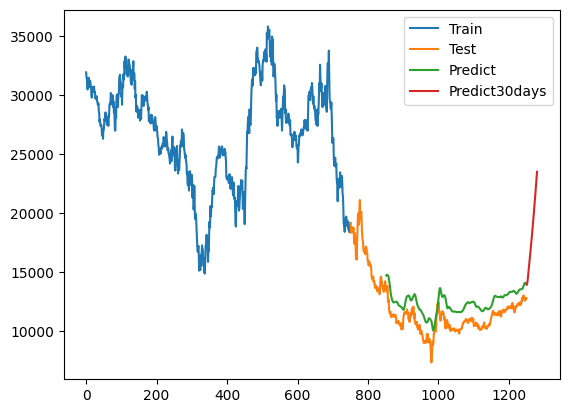

In [51]:
# Vẽ hình du doan 30 ngay

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index,scaler.inverse_transform(lst_output))

plt.legend(['Train','Test','Predict','Predict30days'])
plt.show()

In [52]:
# Dự báo 60 ngày tiếp theo
x_input=test_data[-100:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output_60=[]
n_steps=100
i=0
while(i<60):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output_60.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output_60.extend(yhat.tolist())
        i=i+1

[0.23186044]
101
1 day input [0.14185639 0.14711033 0.14711033 0.15411559 0.14886165 0.14886165
 0.14360771 0.14185639 0.14360771 0.14711033 0.14535902 0.14185639
 0.14360771 0.14360771 0.14535902 0.14185639 0.14535902 0.14886165
 0.14185639 0.14010508 0.14711033 0.15236427 0.15411559 0.14535902
 0.14711033 0.14010508 0.13660245 0.14535902 0.15236427 0.15061296
 0.15236427 0.15411559 0.15761821 0.1558669  0.14886165 0.15236427
 0.15061296 0.15061296 0.1558669  0.15761821 0.1558669  0.15761821
 0.15761821 0.15761821 0.16462347 0.16637478 0.16637478 0.16287215
 0.16287215 0.16462347 0.16637478 0.16112084 0.16287215 0.16462347
 0.16112084 0.16987741 0.16812609 0.16637478 0.17688266 0.16112084
 0.16287215 0.15936953 0.16637478 0.16637478 0.14886165 0.1558669
 0.1558669  0.16112084 0.16637478 0.16812609 0.16637478 0.16812609
 0.17338004 0.17338004 0.17338004 0.17513135 0.17338004 0.17162872
 0.17863398 0.17162872 0.16987741 0.17688266 0.17513135 0.17338004
 0.18388792 0.1821366  0.19264448 

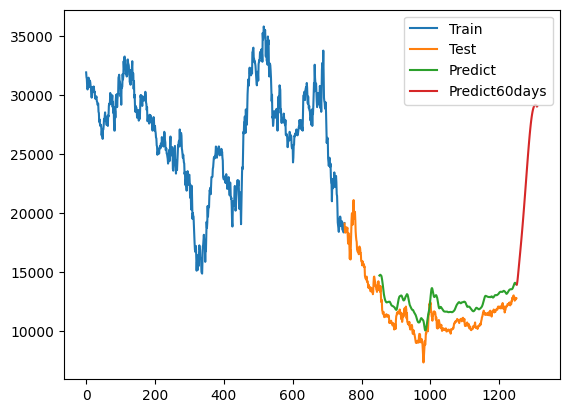

In [53]:
#Vẽ hình du doan 60 ngay

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
prediect_data_index_60 = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+59, step=1)
plt.plot(prediect_data_index_60,scaler.inverse_transform(lst_output_60))

plt.legend(['Train','Test','Predict','Predict60days'])
plt.show()

In [54]:
#Dự báo 90 ngày tiếp theo
x_input=test_data[-100:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output_90=[]
n_steps=100
i=0
while(i<90):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output_90.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output_90.extend(yhat.tolist())
        i=i+1

[0.23186044]
101
1 day input [0.14185639 0.14711033 0.14711033 0.15411559 0.14886165 0.14886165
 0.14360771 0.14185639 0.14360771 0.14711033 0.14535902 0.14185639
 0.14360771 0.14360771 0.14535902 0.14185639 0.14535902 0.14886165
 0.14185639 0.14010508 0.14711033 0.15236427 0.15411559 0.14535902
 0.14711033 0.14010508 0.13660245 0.14535902 0.15236427 0.15061296
 0.15236427 0.15411559 0.15761821 0.1558669  0.14886165 0.15236427
 0.15061296 0.15061296 0.1558669  0.15761821 0.1558669  0.15761821
 0.15761821 0.15761821 0.16462347 0.16637478 0.16637478 0.16287215
 0.16287215 0.16462347 0.16637478 0.16112084 0.16287215 0.16462347
 0.16112084 0.16987741 0.16812609 0.16637478 0.17688266 0.16112084
 0.16287215 0.15936953 0.16637478 0.16637478 0.14886165 0.1558669
 0.1558669  0.16112084 0.16637478 0.16812609 0.16637478 0.16812609
 0.17338004 0.17338004 0.17338004 0.17513135 0.17338004 0.17162872
 0.17863398 0.17162872 0.16987741 0.17688266 0.17513135 0.17338004
 0.18388792 0.1821366  0.19264448 

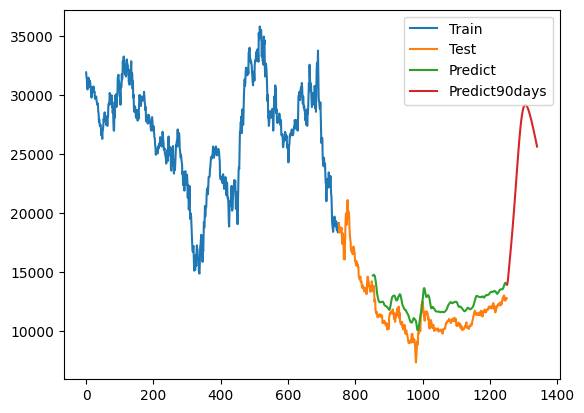

In [55]:
#.Vẽ hình 90 ngay 

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
prediect_data_index_90 = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+89, step=1)
plt.plot(prediect_data_index_90,scaler.inverse_transform(lst_output_90))
plt.legend(['Train','Test','Predict','Predict90days'])
plt.show()